# 06_Implementacion_Modelo

In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Instalar paquetes necesarios (ejecutar solo una vez)
!pip install pandas numpy matplotlib statsmodels pmdarima prophet scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install pmdarima --upgrade


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

# Importar biblitecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


## Importar Datos

In [7]:
# Cargar los datos
file_path = '../Data/combinado_final.xlsx'  # Ajusta la ruta según sea necesario
df = pd.read_excel(file_path)

# Mostrar información básica
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

Primeras filas del dataset:


,Mercado,Precio,Fecha,Producto,Año_Mes
0,Bogotá,2200.0,2005-07-15,Aguacate Papelillo,2005-07
1,Bogotá,2340.0,2005-07-22,Aguacate Papelillo,2005-07
2,Bogotá,2355.0,2005-07-29,Aguacate Papelillo,2005-07
3,Bogotá,2410.0,2005-08-05,Aguacate Papelillo,2005-08
4,Bogotá,2410.0,2005-08-12,Aguacate Papelillo,2005-08



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160488 entries, 0 to 160487
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Mercado   160488 non-null  object        
 1   Precio    160488 non-null  float64       
 2   Fecha     160488 non-null  datetime64[ns]
 3   Producto  160488 non-null  object        
 4   Año_Mes   160488 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 6.1+ MB
None

Estadísticas descriptivas:


,Precio,Fecha
count,160488.000000,160488
mean,2150.347937,2013-07-13 00:04:46.944817920
min,44.000000,1997-01-30 00:00:00
25%,942.000000,2007-07-27 00:00:00
50%,1683.330000,2014-04-26 00:00:00
75%,2880.000000,2020-01-11 00:00:00
max,35400.000000,2025-06-05 00:00:00
std,1748.132993,NaN


### Obtener un DataFrame por cada mercado

In [8]:
# 1. Obtener la lista de Mercados únicos
Mercados = df['Mercado'].unique()

# 2. Diccionario para almacenar los DataFrames
dataframes_por_Mercado = {}

# 3. Crear un DataFrame para cada Mercado
for Mercado in Mercados:
    # Filtrar el DataFrame original para obtener solo los datos del Mercado actual
    df_Mercado = df[df['Mercado'] == Mercado].copy()
    
    # Almacenar el DataFrame en el diccionario
    dataframes_por_Mercado[Mercado] = df_Mercado
    
    # Mostrar información del DataFrame
    print(f"\n{'='*50}")
    print(f"DataFrame para el Mercado: {Mercado}")
    print(f"Número de registros: {len(df_Mercado)}")
    df_Mercado.info()

# 4. Acceder a los DataFrames individuales
# Por ejemplo, para acceder al DataFrame de Bogotá:
# df_bogota = dataframes_por_Mercado['Bogotá']


DataFrame para el Mercado: Bogotá
Número de registros: 52006
<class 'pandas.core.frame.DataFrame'>
Index: 52006 entries, 0 to 159431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mercado   52006 non-null  object        
 1   Precio    52006 non-null  float64       
 2   Fecha     52006 non-null  datetime64[ns]
 3   Producto  52006 non-null  object        
 4   Año_Mes   52006 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.4+ MB

DataFrame para el Mercado: Tunja
Número de registros: 47217
<class 'pandas.core.frame.DataFrame'>
Index: 47217 entries, 90 to 159432
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Mercado   47217 non-null  object        
 1   Precio    47217 non-null  float64       
 2   Fecha     47217 non-null  datetime64[ns]
 3   Producto  47217 non-null  object        

### Crear dataset completo unificando fechas y precios por cada mercado

In [9]:
import pandas as pd

# Asegurar formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 1. Filtrar Mercado objetivo
df_sogamoso = df[df['Mercado'] == 'Sogamoso'][['Fecha', 'Producto', 'Precio']].copy()
df_sogamoso = df_sogamoso.rename(columns={'Precio': 'Precio_Sogamoso'})

# 2. Inicializar base de unión
df_completo = df_sogamoso.copy()

# 3. Definir Mercados que quieres cruzar
otros_Mercados = ['Tunja', 'Duitama', 'Bogotá']  # ajusta según tus datos

# 4. Agregar Precios de los otros Mercados
for Mercado in otros_Mercados:
    df_otro = df[df['Mercado'] == Mercado][['Fecha', 'Producto', 'Precio']].copy()
    df_otro = df_otro.rename(columns={'Precio': f'Precio_{Mercado}'})
    
    df_completo = pd.merge(
        df_completo,
        df_otro,
        on=['Fecha', 'Producto'],
        how='left'  # o 'inner' si solo quieres las Fechas/Productos con datos en todos los Mercados
    )

# 5. Ver resultado
df_completo.head()



,Fecha,Producto,Precio_Sogamoso,Precio_Tunja,Precio_Duitama,Precio_Bogotá
0,2010-11-19,Aguacate Papelillo,4000.0,NaN,NaN,4261.67
1,2010-11-26,Aguacate Papelillo,4000.0,NaN,NaN,4155.00
2,2010-12-03,Aguacate Papelillo,4000.0,NaN,NaN,4323.33
3,2010-12-10,Aguacate Papelillo,4000.0,NaN,NaN,4435.83
4,2010-12-17,Aguacate Papelillo,4000.0,NaN,NaN,4615.00


### Sacar el promedio de los mercados y añadirlo a otra columna

In [18]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame llamado df
columnas_precios = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá']

# Agregar la columna del promedio por día ignorando NaNs
df_completo['Promedio_Mercados'] = df_completo[columnas_precios].mean(axis=1, skipna=True)


### Rellenar el los datos faltantes de los mercados con el promedio diario

In [19]:

# Lista de columnas con posibles NaN que quieres rellenar
columnas_precios = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá']

# Rellenar NaNs en cada columna con el valor de la columna Promedio_Mercados de esa fila
for col in columnas_precios:
    df_completo[col] = df_completo[col].fillna(df_completo['Promedio_Mercados'])


In [20]:
df_completo.head()

,Fecha,Producto,Precio_Sogamoso,Precio_Tunja,Precio_Duitama,Precio_Bogotá,Promedio_Mercados
0,2010-11-19,Aguacate Papelillo,4000.0,4130.835,4130.835,4261.67,4130.835
1,2010-11-26,Aguacate Papelillo,4000.0,4077.500,4077.500,4155.00,4077.500
2,2010-12-03,Aguacate Papelillo,4000.0,4161.665,4161.665,4323.33,4161.665
3,2010-12-10,Aguacate Papelillo,4000.0,4217.915,4217.915,4435.83,4217.915
4,2010-12-17,Aguacate Papelillo,4000.0,4307.500,4307.500,4615.00,4307.500


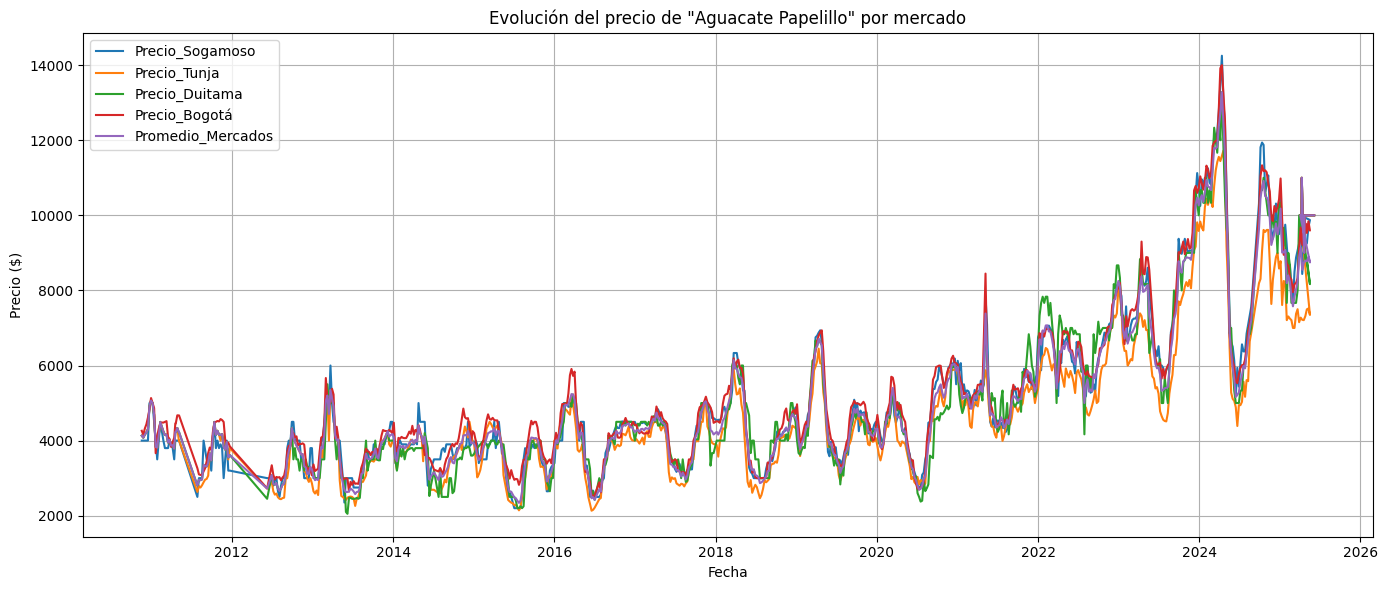

In [21]:
import matplotlib.pyplot as plt

# Lista de mercados
mercados = ['Precio_Sogamoso', 'Precio_Tunja', 'Precio_Duitama', 'Precio_Bogotá','Promedio_Mercados']

# Elegimos un producto para visualizar, por ejemplo: Aguacate Papelillo
producto_objetivo = 'Aguacate Papelillo'

# Filtrar el DataFrame solo para ese producto
df_producto = df_completo[df_completo['Producto'] == producto_objetivo]

# Crear gráfica
plt.figure(figsize=(14, 6))

# Dibujar cada mercado
for mercado in mercados:
    plt.plot(df_producto['Fecha'], df_producto[mercado], label=mercado)

# Personalización
plt.title(f'Evolución del precio de "{producto_objetivo}" por mercado')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Exportar el DataFrame completo a un nuevo archivo Excel
output_file_path = '../Data/Input/df_completo.xlsx'
df_completo.to_excel(output_file_path, index=False)
print(f"\nDataFrame completo exportado a: {output_file_path}")


DataFrame completo exportado a: ../Data/Input/df_completo.xlsx
